In this dataset you have 3 different outputs:
<ol>
<li>No readmission;</li>
<li>A readmission in less than 30 days (this situation is not good, because maybe
your treatment was not appropriate);</li>
<li>A readmission in more than 30 days (this one is not so good as well the last
one, however, the reason could be the state of the patient.</li>

<strong><em>task: </em></strong> classify a patient-hospital outcome or to cluster them aiming at
finding patterns that give a distinct insight.


In [51]:
# Importing packages
import pandas as pd
import numpy  as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import sklearn.metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from scipy import interp
import seaborn as sns
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy.optimize import fsolve
#import zipfile36 as zipfile
from urllib.request import urlopen
from zipfile import *
from io import BytesIO
import re
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import kmodes

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [54]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [55]:
resp = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip')
zipfile = ZipFile(BytesIO(resp.read()))
zipfile.namelist()

['dataset_diabetes/diabetic_data.csv', 'dataset_diabetes/IDs_mapping.csv']

In [56]:
import requests, zipfile, io

url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip'
filename='dataset_diabetes/diabetic_data.csv'

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

import pandas as pd
df = pd.read_csv(filename, sep=',') #, engine='python')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [57]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [58]:
df.describe(include = 'object')

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [59]:
df2=df.replace({'?':None})

In [60]:
df2.describe(include = 'object')

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101766,101766,3197,61510,51817,101745,101408,100343,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,9,17,72,716,748,789,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),[75-100),MC,InternalMedicine,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,1336,32439,14635,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [62]:
df2['max_glu_serum']

0         None
1         None
2         None
3         None
4         None
          ... 
101761    None
101762    None
101763    None
101764    None
101765    None
Name: max_glu_serum, Length: 101766, dtype: object

In [63]:
type(df2['max_glu_serum'][0])

str

In [64]:
df3=df2.replace({'None':None})

In [65]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In the next step the columns that have a high percentage of missing data are removed from the dataset.

In [66]:
data = df3.drop(columns=["weight", "payer_code", "medical_specialty", "max_glu_serum"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [67]:
data.describe(include = 'object')

,race,gender,age,diag_1,diag_2,diag_3,A1Cresult,metformin,repaglinide,nateglinide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101766,101766,101745,101408,100343,17018,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,716,748,789,3,4,4,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),428,276,250,>8,No,No,No,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,6862,6752,11555,8216,81778,100227,101063,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [18]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


I found that some patients has more than one encounter, and looking to avoid a bias, I only keep the first encounter.
I asummeD that the encounter_id is a lower value at the first visit and I keep only the lower number as the first enconunter.
I sorted by encounter ID and then remove according 'patient_nbr'.

In [69]:
data=data.sort_values(by=['encounter_id'])

In [70]:
data=data.drop_duplicates(subset='patient_nbr', keep="first")
data.reset_index(drop=True,inplace=True)
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,47,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,443842016,183087545,Caucasian,Female,[70-80),1,1,7,9,50,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
71514,443842022,188574944,Other,Female,[40-50),1,1,7,14,73,...,No,Up,No,No,No,No,No,Ch,Yes,>30
71515,443842070,140199494,Other,Female,[60-70),1,1,7,2,46,...,No,Steady,No,No,No,No,No,No,Yes,>30
71516,443842340,120975314,Caucasian,Female,[80-90),1,1,7,5,76,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [71]:
pruebas= [data['diag_1'][21], data['diag_1'][40],data['diag_1'][113],data['diag_1'][113], data['diag_1'][311]]
pruebas

['V57', 'V57', '428', '428', 'V55']

In [18]:
regex1 = re.compile(r"^V", re.IGNORECASE)
for line in pruebas:
    line = regex1.sub("1000", line)
    print(line)

100057
100057
428
428
100055


In [72]:
data['diag_1']=data['diag_1'].replace('^V', '1000', regex=True)

In [75]:
data['diag_1']=data['diag_1'].replace('^E', '2000', regex=True)

In [76]:
data['diag_1'] = pd.to_numeric(data['diag_1'], downcast="float")

In [78]:
def label_diag (row):
    if ((row['diag_1'] >= 390 and row['diag_1'] <= 459) or (row['diag_1'] == 785)):
        return 'Circulatory'
    if ((row['diag_1'] >= 460 and row['diag_1'] <= 519) or (row['diag_1'] == 786)):
        return 'Respiratory'
    if ((row['diag_1'] >= 520 and row['diag_1'] <= 579) or (row['diag_1'] == 787)):
        return 'Digestive'
    if (row['diag_1'] >= 250 and row['diag_1'] < 251):
        return 'Diabetes'
    if (row['diag_1'] >= 800 and row['diag_1'] <= 999):
        return 'Injury'
    if (row['diag_1'] >= 710 and row['diag_1'] <= 739):
        return 'Musculoskeletal'
    if ((row['diag_1'] >= 580 and row['diag_1'] <= 629) or (row['diag_1'] == 788)):
        return 'Genitourinary'
    if ((row['diag_1'] >= 140 and row['diag_1'] <= 239) or (row['diag_1'] == 780 or row['diag_1'] == 781 or row['diag_1'] == 782) or (row['diag_1'] >= 790 and row['diag_1'] <= 799) or (row['diag_1'] >= 240 and row['diag_1'] <= 249) or (row['diag_1'] >= 251 and row['diag_1'] <= 279)):
        return 'Neoplasms'
    #if (row['diag_1'] >= 1000):
        #return 'Other'
    else:
        return 'Other'
 

In [79]:
data['diagnostic_group'] = data.apply (lambda row: label_diag(row), axis=1)

In [80]:
data['diagnostic_group']

0          Circulatory
1          Circulatory
2            Neoplasms
3             Diabetes
4          Circulatory
             ...      
71513        Digestive
71514    Genitourinary
71515           Injury
71516            Other
71517        Digestive
Name: diagnostic_group, Length: 71518, dtype: object

In [81]:
data['diagnostic_group'].describe(include = 'object')

count           71518
unique              9
top       Circulatory
freq            21894
Name: diagnostic_group, dtype: object

With the new variable 'diagnostic_group', I classify the first diagnostic according to 'Table 2' explaination (https://www.hindawi.com/journals/bmri/2014/781670/tab2/), and I only take that one because the others could be consecuences of the first diagnostic or something that appears later. In this way, I eliminate for our analysis the initial variables: 'diag_1','diag_2','diag_3'.

I decide to eliminate the 24 features realted to medications, because those are tecnical tophics and we need a professional medical advisor to choose wicht of those are more relevant to diabetes deseases.

In [82]:
ds= [data['gender'],data['age'], data['race'],data['admission_source_id'], data['discharge_disposition_id'], data['diagnostic_group'],data['readmitted']]
headers = ['gender', 'age','race','admission_source_id','discharge_disposition_id','diagnostic_group','readmitted']

dataset = pd.concat(ds, axis=1, keys=headers)
dataset

,gender,age,race,admission_source_id,discharge_disposition_id,diagnostic_group,readmitted
0,Female,[80-90),Caucasian,4,1,Circulatory,NO
1,Female,[90-100),Caucasian,4,3,Circulatory,NO
2,Male,[40-50),Caucasian,7,1,Neoplasms,NO
3,Female,[40-50),AfricanAmerican,7,1,Diabetes,>30
4,Male,[50-60),Caucasian,2,1,Circulatory,>30
...,...,...,...,...,...,...,...
71513,Female,[70-80),Caucasian,7,1,Digestive,>30
71514,Female,[40-50),Other,7,1,Genitourinary,>30
71515,Female,[60-70),Other,7,1,Injury,>30
71516,Female,[80-90),Caucasian,7,1,Other,NO


In [83]:
dataset.describe(include = 'object')

,gender,age,race,diagnostic_group,readmitted
count,71518,71518,69570,71518,71518
unique,3,10,5,9,3
top,Female,[70-80),Caucasian,Circulatory,NO
freq,38025,18210,53491,21894,42985


## MODEL CREATION

Split data into input (X) and output (y)

In [92]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

In [88]:
X

,gender,age,race,gender,admission_source_id,discharge_disposition_id,diagnostic_group
0,Female,[80-90),Caucasian,Female,4,1,Circulatory
1,Female,[90-100),Caucasian,Female,4,3,Circulatory
2,Male,[40-50),Caucasian,Male,7,1,Neoplasms
3,Female,[40-50),AfricanAmerican,Female,7,1,Diabetes
4,Male,[50-60),Caucasian,Male,2,1,Circulatory
...,...,...,...,...,...,...,...
71513,Female,[70-80),Caucasian,Female,7,1,Digestive
71514,Female,[40-50),Other,Female,7,1,Genitourinary
71515,Female,[60-70),Other,Female,7,1,Injury
71516,Female,[80-90),Caucasian,Female,7,1,Neoplasms


### dealing with outliers

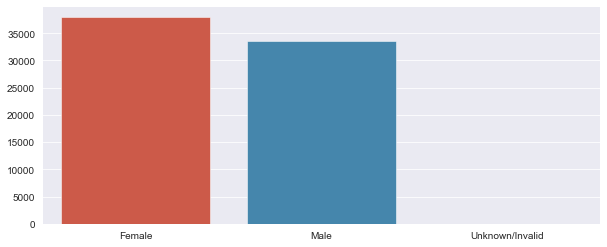

In [84]:
gender=dataset.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=gender.index, y=gender.values)
plt.show()

In [85]:
dataset['gender']=dataset.gender.replace({'Unknown/Invalid':'Female'})

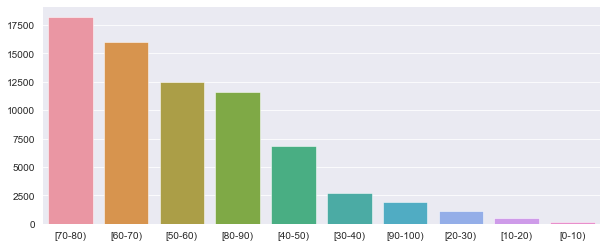

In [86]:
age=dataset.age.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=age.index, y=age.values)
plt.show()

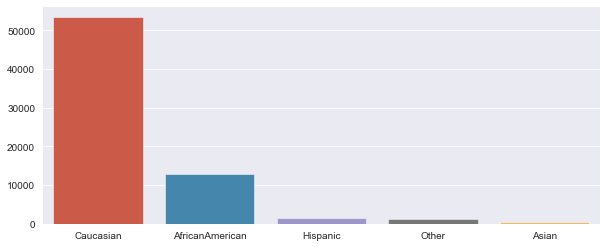

In [87]:
race=dataset.race.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=race.index, y=race.values)
plt.show()

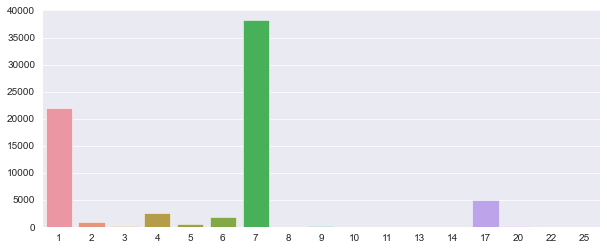

In [88]:
admission_source_id=dataset.admission_source_id.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=admission_source_id.index, y=admission_source_id.values)
plt.show()

In [89]:
dataset.admission_source_id.describe(include = 'object')

count    71518.000000
mean         5.657457
std          4.162580
min          1.000000
25%          1.000000
50%          7.000000
75%          7.000000
max         25.000000
Name: admission_source_id, dtype: float64

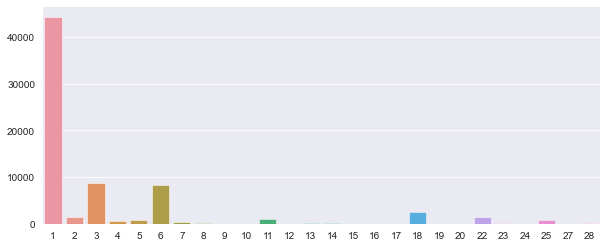

In [90]:
discharge_disposition_id=dataset.discharge_disposition_id.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=discharge_disposition_id.index, y=discharge_disposition_id.values)
plt.show()

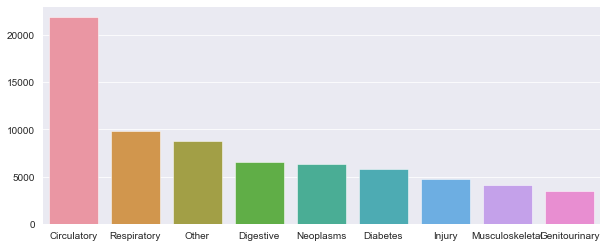

In [91]:
diagnostic_group=dataset.diagnostic_group.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=diagnostic_group.index, y=diagnostic_group.values)
plt.show()

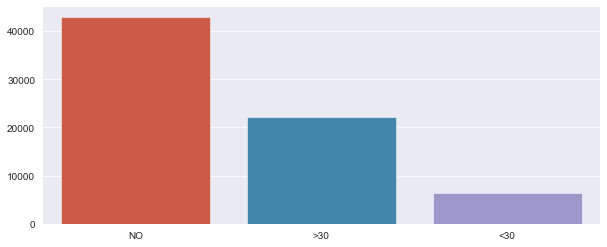

In [151]:
readmitted=dataset.readmitted.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=readmitted.index, y=readmitted.values)
plt.show()

In [152]:
dataset['readmitted']=dataset.readmitted.replace({'NO':0,'<30':1,'>30':2,})

In [203]:
dm1= pd.get_dummies(dataset['gender'], prefix='gender')

In [204]:
dm2= pd.get_dummies(dataset['race'], prefix='race')

In [205]:
dm3= pd.get_dummies(dataset['age'], prefix='age')

In [206]:
dm4= pd.get_dummies(dataset['diagnostic_group'], prefix='diag_group')

In [207]:
dm5= pd.get_dummies(dataset['readmitted'], prefix='readmitted')

In [132]:
dats= pd.concat([dm1,dm2,dm3,dm4], axis=1)
dats

,gender_Female,gender_Male,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[0-10),age_[10-20),age_[20-30),...,age_[90-100),diag_group_Circulatory,diag_group_Diabetes,diag_group_Digestive,diag_group_Genitourinary,diag_group_Injury,diag_group_Musculoskeletal,diag_group_Neoplasms,diag_group_Other,diag_group_Respiratory
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
71514,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
71515,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
71516,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Initial Cluster Approach

As an approach to the cluster methodology, it is proposed to use the elbow method, which in a visual way of approaching the number of clusters required according to the data set

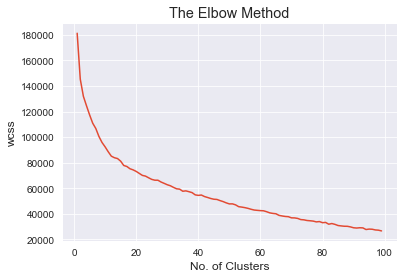

In [137]:
#graph the number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 100):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
    km.fit(dats)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 100), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [117]:
#Importing KMeans
from sklearn.cluster import KMeans

In [143]:
#mapping each row to its correponding cluster
from kmodes.kmodes import KModes
test=KModes(n_clusters=20, init='Cao') 
cluster=test.fit_predict(dats, categorical=list(dats.columns))

In [144]:
test.cluster_centroids_

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Classification Models 

I explore different classifciation models looking for find the model that has the best fit to the data

In [154]:
X = dats
y= dataset['readmitted']

In [155]:
type(y)

pandas.core.series.Series

In [156]:
y=y.to_numpy()

Split data for training and test

In [185]:
#Se crea la muestra de entrenamiento y de test, tanto para predictores como para la variable objetivo, siendo test el 40%
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=.3) # pred:=predictores, tar:=target

In [186]:
len(train_x),len(test_x), len(train_y), len(test_y)

(50062, 21456, 50062, 21456)

Models definitions:
<ul>
<li>model1:= RandomForestClassifier</li>
<li>model2:= Algoritmo XGBClassifier</li>
<li>model3:= DecisionTreeClassifier </li>
</ul>

### RandomForestClassifier

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
model1=RandomForestClassifier(n_estimators=25)

In [188]:
model1=model1.fit(pred_train,tar_train)

In [189]:
predictions=model1.predict(pred_test)

In [190]:
import sklearn.metrics

In [191]:
#Confusion matrix. It shows how bad/good makes the algorith the classification according to the existing categories
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[16785,    25,   270],
       [ 2475,     6,    45],
       [ 8851,     6,   145]], dtype=int64)

In [192]:
#Accuracy index
sklearn.metrics.accuracy_score(tar_test, predictions)

0.5920022371364653

### Neural Networks

In [210]:
from sklearn.neural_network import MLPClassifier

model2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=1)
model2.fit(train_x, train_y)
round(model2.score(X,y), 4)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6007

In [211]:
model2ts = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=1)
model2ts.fit(test_x, test_y)
round(model2.score(X,y), 4)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.601

###  DecisionTreeClassifier

In [196]:
model3 = DecisionTreeClassifier() 
model3.fit(train_x, train_y) 

DecisionTreeClassifier()

In [197]:
predict_train_DTC= model3.predict(train_x)
predict_train_DTC

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [198]:
predict_test_DTC= model3.predict(test_x)
predict_test_DTC

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [200]:
sklearn.metrics.confusion_matrix(test_y,predict_test_DTC)

array([[12654,    11,   187],
       [ 1920,     5,    31],
       [ 6536,     1,   111]], dtype=int64)

In [202]:
sklearn.metrics.accuracy_score(test_y, predict_test_DTC)

0.5951715137956749

### Conclusions


As none of the methodologies reaches an approximation given the chosen variables, it is necessary to carry out other types of combinations of variables and rerun the exercise so that the chosen variables and their combinations become explanatory and acuraccies of at least 90%

Some variables removed for this exercise such as discharge_disposition_id and admission_source_id would be better related if we understood what each of the numbers corresponds to

The actual combination variables could have some bias that affect all the measurements